In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [11]:
enumerate(messages[:10])

In [14]:
for message_no, message in enumerate(messages[:5]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [20]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [27]:
messages['length']= messages['message'].apply(len)

In [28]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [34]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24212e48>]],
      dtype=object)

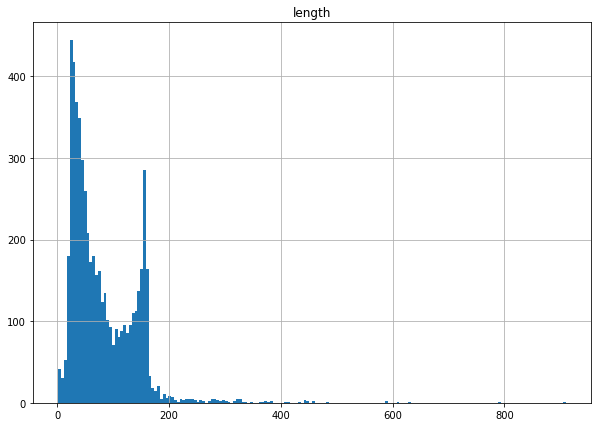

In [40]:
messages.hist('length',bins=180,figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24288240>,
      dtype=object)

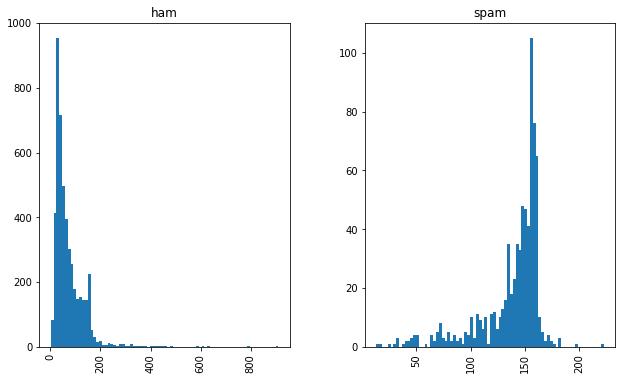

In [41]:
messages.hist('length',by='label',bins =80,figsize=(10,6))

In [42]:
import string

In [43]:
mess='this is my first example.'

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
nopunc=[c for c in mess if c not in string.punctuation]

In [49]:
from nltk.corpus import stopwords

In [52]:
#stopwords.words('english')

In [54]:
nopunc=''.join(nopunc)

In [55]:
nopunc

'this is my first example'

In [63]:
x=['a','b','c','f']

In [64]:
x='$'.join(x)

In [65]:
x

'a$b$c$f'

In [66]:
nopunc.split()

['this', 'is', 'my', 'first', 'example']

In [72]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [73]:
clean_mess

['first', 'example']

In [74]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [75]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [84]:
print(len(bow_transformer.vocabulary_))

11425


In [87]:
mess3=messages['message'][3]

In [88]:
mess3

'U dun say so early hor... U c already then say...'

In [90]:
bow3=bow_transformer.transform([mess3])

In [91]:
print(bow3)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [92]:
print(bow3.shape)

(1, 11425)


In [93]:
bow_transformer.get_feature_names()[4068]

'U'

In [94]:
message_bow=bow_transformer.transform(messages['message'])

In [95]:
message_bow

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [97]:
message_bow.shape

(5572, 11425)